# Rocket guidance

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

___

<br>

Proportional Navigation (PN) is a widely used guidance law in missile and rocket systems designed to intercept moving targets efficiently. The fundamental principle of PN is to adjust the missile’s acceleration in proportion to the rate of change of the Line of Sight (LOS) angle to the target. This method is favored for its simplicity and effectiveness in homing guidance systems.

<br>

## Intercept geometry

Consider a missile and a target moving in a two-dimensional plane. The missile's objective is to intercept the target by minimizing the miss distance at the closest point of approach. PN achieves this by ensuring that the LOS rate is driven to zero, effectively guiding the missile to collide with the target if no perturbations occur.


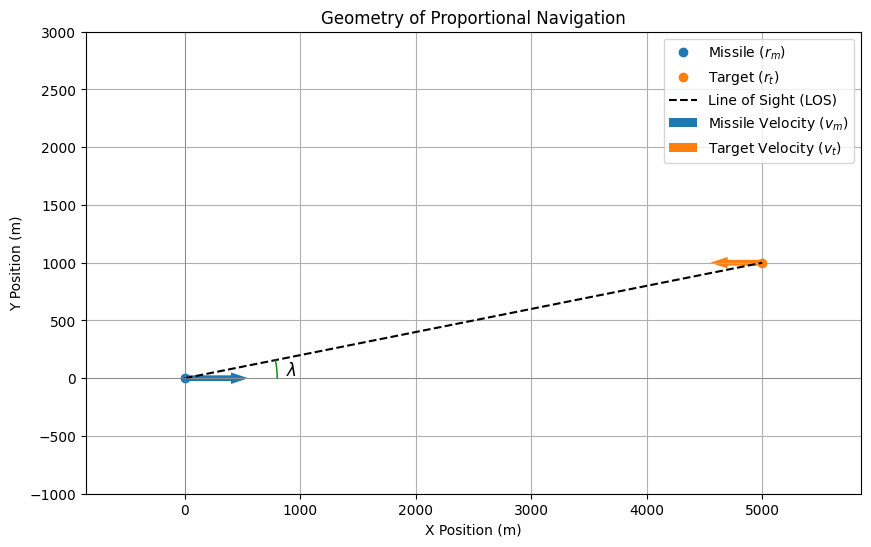

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Positions
r_m = np.array([0, 0])        # Missile position
r_t = np.array([5000, 1000])  # Target position

# LOS vector
delta_r = r_t - r_m
lambda_angle = np.arctan2(delta_r[1], delta_r[0])

# Unit vectors
u_los = delta_r / np.linalg.norm(delta_r)
n_normal = np.array([-u_los[1], u_los[0]])  # Normal to LOS

# Missile and Target velocities
# Missile velocity vector
v_magnitude = 400  # Missile speed (m/s)
v_m = v_magnitude * np.array([np.cos(0), np.sin(0)])

# Target velocity vector
v_t_magnitude = 300  # Target speed (m/s)
v_t = v_t_magnitude * np.array([np.cos(np.pi), np.sin(np.pi)])

# Plot settings
plt.figure(figsize=(10, 6), dpi=100)

# Plot missile and target positions
plt.plot(*r_m, 'o', color=plt.cm.tab20(0), label='Missile ($r_m$)')
plt.plot(*r_t, 'o', color=plt.cm.tab20(2), label='Target ($r_t$)')

# Plot LOS
plt.plot([r_m[0], r_t[0]], [r_m[1], r_t[1]], 'k--', \
         label='Line of Sight (LOS)')

# Annotate LOS angle
arc_radius = 800
theta = np.linspace(0, lambda_angle, 100)
x_arc = arc_radius * np.cos(theta)
y_arc = arc_radius * np.sin(theta)
plt.plot(x_arc, y_arc, 'g-', linewidth=1)
plt.text(arc_radius * np.cos(lambda_angle / 2)+80,
         arc_radius * np.sin(lambda_angle / 2)-50,
         '$\lambda$', fontsize=12)

# Plot missile velocity vector
plt.arrow(*r_m, *v_m, head_width=100, width=50, color=plt.cm.tab20(0), \
          ec='none', label='Missile Velocity ($v_m$)')

# Plot target velocity vector
plt.arrow(*r_t, *v_t, head_width=100, width=50, color=plt.cm.tab20(2), \
          ec='none', label='Target Velocity ($v_t$)')


# Coordinate axes
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Labels and title
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Geometry of Proportional Navigation')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-1000, 6000)
plt.ylim(-1000, 3000)
plt.show()

The diagram illustrates a two-dimensional plane where both the missile and the target are moving. The missile is at position  ${r}_m$  with velocity  ${v}_m$, and the target is at position  ${r}_t$  with velocity  ${v}_t$ . The Line of Sight (LOS) connects the missile and the target, forming an angle  $\lambda$  with a reference axis (typically the horizontal axis). The LOS angle  $\lambda$  changes as both the missile and the target move.

<br>

___

<br>

## Formulation

Let’s define:

- ${r}_m = (x_m, y_m)$ : Position vector of the missile.
- ${r}_t = (x_t, y_t)$ : Position vector of the target.
- ${v}_m = (V_{m,x}, V_{m,y})$ : Velocity vector of the missile.
- ${v}_t = (V_{t,x}, V_{t,y})$ : Velocity vector of the target.
- $\lambda$ : Line of Sight (LOS) angle between the missile and the target.
- $\dot{\lambda}$ : Rate of change of the LOS angle.

<br>

The LOS angle  $\lambda$  is calculated as:

$$\lambda = \tan^{-1}\left( \frac{y_t - y_m}{x_t - x_m} \right)
= \angle \left(r_t-r_m\right)$$

and the rate of change of the LOS angle  $\dot{\lambda}$  is:

$$\dot{\lambda} = \frac{(v_{t,y} - v_{m,y})(x_t - x_m) - (v_{t,x} - v_{m,x})(y_t - y_m)}{(x_t - x_m)^2 + (y_t - y_m)^2}
= \frac{(r_t-r_m)\times(v_t-v_m)}{\|r_t-r_m\|^2}$$




<br>

## Proportional navigation guidance

The acceleration command  ${a}_m$ for the missile is given by:

$${a}_m = N v_c \dot{\lambda} {n}$$

where:

- $N$ : Navigation constant (typically between 3 and 5).
- $v_c$ : Closing velocity between the missile and the target.
- ${n}$ : Unit vector normal to the LOS direction.

<br>

The closing velocity  $v_c$  is the relative velocity component of the target along the line of sight direction:

$$
v_c = (v_t - v_m) ^T u
$$

where  ${u}$ is the unit vector along the LOS:

$$
{u} = \frac{{r}_t - {r}_m}{\|{r}_t - {r}_m\|}
$$

and  ${n}$  is the unit vector normal to  ${u}$ :

$$
 {n} = \bmatrix -u_y \\ u_x }
$$

<br>

___

<br>

## Numerical experiments

We will simulate a missile intercepting a target using Proportional Navigation in Python.

Assumptions

-	Two-dimensional motion.
-	Constant speeds for both missile and target.
-	The missile moves faster than the target.
-	The target moves with a constant velocity (non-maneuvering).

Target intercepted at time 7.48 seconds


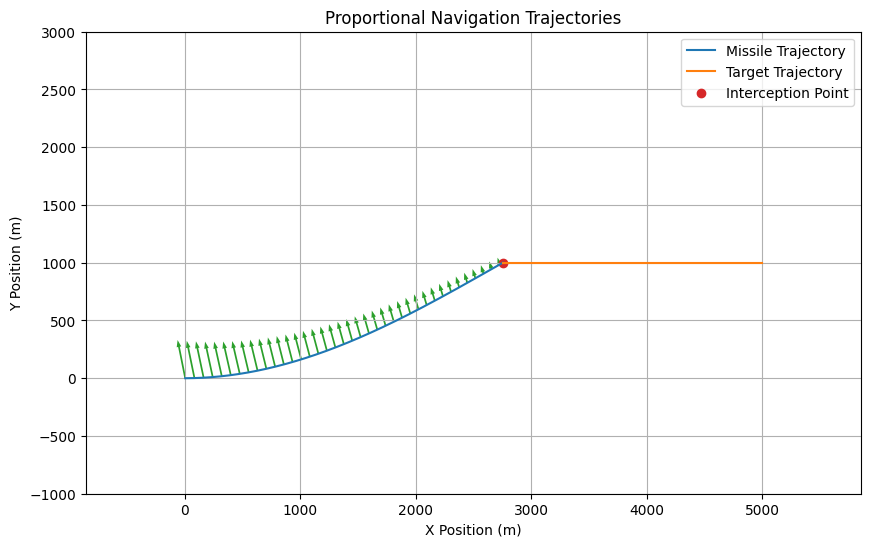

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (seconds)
t_end = 20  # End time (seconds)
time = np.arange(0, t_end, dt)

# Missile initial conditions
r_m = np.array([0.0, 0.0])  # Initial position (meters)
v_magnitude = 400.0  # Missile speed (m/s)
v_m = v_magnitude * np.array([np.cos(0), np.sin(0)])  # to right

# Target initial conditions
r_t = np.array([5000.0, 1000.0])  # Initial position (meters)
v_t = 300.0 * np.array([np.cos(np.pi), np.sin(np.pi)])  # to left

# Navigation constant
N = 3.0

# Lists to store trajectory data
missile_path = []
target_path = []
maneuver_acc = []

for t in time:
    # Relative position and velocity
    delta_r = r_t - r_m
    delta_v = v_t - v_m
    range_sq = np.dot(delta_r, delta_r)

    # LOS angle and its rate
    LOS_angle = np.arctan2(delta_r[1], delta_r[0])
    #lambda_dot = (delta_r[0]*delta_v[1]-delta_r[1]*delta_v[0])/range_sq
    lambda_dot = np.cross(delta_r, delta_v) / range_sq

    # Closing velocity
    v_c = -np.dot(delta_v, delta_r) / np.linalg.norm(delta_r)

    # Acceleration command
    a_magnitude = N * v_c * lambda_dot
    u = np.array([-np.sin(LOS_angle), np.cos(LOS_angle)]) # LOS normal
    a_m = a_magnitude * u   # maneuver acceleration vector

    # Update missile velocity and position
    v_m += a_m * dt
    r_m += v_m * dt

    # Update target position
    r_t += v_t * dt

    # Store positions
    missile_path.append(r_m.copy())
    target_path.append(r_t.copy())
    maneuver_acc.append(a_m.copy())

    # Check for interception (within 10 meters)
    if np.linalg.norm(delta_r) < 10.0:
        print(f"Target intercepted at time {t:.2f} seconds")
        break

# Convert paths to arrays for plotting
missile_path = np.array(missile_path)
target_path = np.array(target_path)

# Plot trajectories
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(missile_path[:, 0], missile_path[:, 1], \
         label='Missile Trajectory', color=plt.cm.tab20(0))
plt.plot(target_path[:, 0], target_path[:, 1], \
         label='Target Trajectory', color=plt.cm.tab20(2))
for i in range(0,len(maneuver_acc),20):
  plt.arrow(*missile_path[i], *maneuver_acc[i]*5, head_width=40,
            width=15, color=plt.cm.tab20(4), ec='none')


plt.scatter(r_m[0], r_m[1], color=plt.cm.tab20(6), \
            label='Interception Point')

plt.title('Proportional Navigation Trajectories')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-1000, 6000)
plt.ylim(-1000, 3000)
plt.show()